In [1]:
import pandas as pd
import numpy as np
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
%matplotlib inline

In [2]:
df = pd.read_pickle("data/final_dataset.pkl")

In [3]:
df.head()

,name,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,investor_funding_total,month_between_funding,new_status
0,#waywire,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,0.000000,acquired
1,1000memories,2.0,15000.0,2520000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5055000.0,13.700000,acquired
2,100Plus,2.0,750000.0,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1250000.0,0.933333,acquired
3,10BestThings,1.0,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,0.000000,closed
4,170 Systems,1.0,0.0,14000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28000000.0,0.000000,acquired


# 1. Preprocess all the features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3877 entries, 0 to 3876
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    3877 non-null   object 
 1   funding_rounds          3877 non-null   float64
 2   seed                    3877 non-null   float64
 3   venture                 3877 non-null   float64
 4   equity_crowdfunding     3877 non-null   float64
 5   undisclosed             3877 non-null   float64
 6   convertible_note        3877 non-null   float64
 7   debt_financing          3877 non-null   float64
 8   angel                   3877 non-null   float64
 9   grant                   3877 non-null   float64
 10  private_equity          3877 non-null   float64
 11  post_ipo_equity         3877 non-null   float64
 12  post_ipo_debt           3877 non-null   float64
 13  secondary_market        3877 non-null   float64
 14  product_crowdfunding    3877 non-null   

# 2. Create response variable (success) (has to be 0|1)
- closed = 0, IPO|acquired = 1
- balance your dataset: same number of success = 1 as success = 0

In [5]:
df = (df
      .assign(success=np.where(df["new_status"] == "closed", 0, 1))
      .drop(columns=["new_status"]))

In [6]:
df.head()

,name,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,investor_funding_total,month_between_funding,success
0,#waywire,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0,0.000000,1
1,1000memories,2.0,15000.0,2520000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5055000.0,13.700000,1
2,100Plus,2.0,750000.0,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1250000.0,0.933333,1
3,10BestThings,1.0,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,0.000000,0
4,170 Systems,1.0,0.0,14000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28000000.0,0.000000,1


# Undersampling
**balance your dataset: same number of success = 1 as success = 0**

In [7]:
df["success"].value_counts()

1    2647
0    1230
Name: success, dtype: int64

In [9]:
df_success = df[df["success"] == 1].copy()
df_fail = df[df["success"] == 0].copy()

In [11]:
df_undersampled = df_success.sample(len(df_fail)).reset_index(drop=True)

In [17]:
df = pd.concat([df_undersampled, df_fail], ignore_index=True).sample(frac=1).reset_index(drop=True)

# Success/Failure 

In [18]:
df.isnull().values.any()

False

NameError: name 'LABELS' is not defined

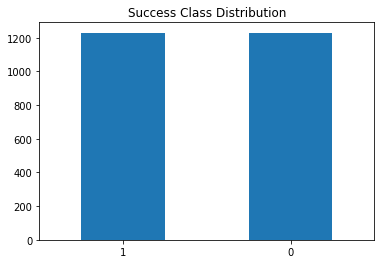

In [20]:
count_classes = pd.value_counts(df['success'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Success Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Success")

plt.ylabel("funding_rounds")

# 3. Split Train Test
- split dataset to train and test


In [ ]:
df.dtypes

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train, test = train_test_split(df, test_size=.2, random_state=17)

In [23]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [24]:
train.head()

,name,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,investor_funding_total,month_between_funding,success
0,WinDensity,1.0,0.0,13000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26000000.0,0.000000,0
1,Mailgun,2.0,1100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1100000.0,16.566667,1
2,Search to Phone,2.0,15000.0,0.0,0.0,0.0,0.0,0.0,250000.0,0.0,0.0,0.0,0.0,0.0,0.0,265000.0,2.966667,0
3,Greenplum Software,5.0,0.0,88899155.0,0.0,0.0,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181798310.0,37.066667,1
4,Credit Coach,2.0,100000.0,0.0,0.0,0.0,0.0,0.0,900000.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,7.600000,0


In [25]:
test.head()

,name,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,investor_funding_total,month_between_funding,success
0,Altheos,2.0,0.0,32500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000000.0,22.500000,0
1,Cloudmeter,2.0,0.0,5000000.0,0.0,0.0,0.0,300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10300000.0,37.400000,1
2,Loyalize,1.0,0.0,0.0,0.0,0.0,0.0,3000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000000.0,0.000000,1
3,PostPath,2.0,0.0,24300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48600000.0,25.666667,1
4,Modulus Video,2.0,204000.0,8500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17204000.0,4.833333,1


In [27]:
train["success"].value_counts(normalize=True)

1    0.500508
0    0.499492
Name: success, dtype: float64

In [26]:
test["success"].value_counts(normalize=True)

0    0.502033
1    0.497967
Name: success, dtype: float64

In [28]:
train.to_pickle("data/train.pkl")
test.to_pickle("data/test.pkl")

In [29]:
# categorize columns
num_cols = ["funding_rounds","seed","venture","equity_crowdfunding","undisclosed","convertible_note","debt_financing","angel","grant","private_equity","post_ipo_equity","post_ipo_debt","secondary_market","product_crowdfunding","investor_funding_total","month_between_funding"]
name = ["name"]
response = ["success"]

train_X = train[num_cols]
train_y = train[response].values.ravel()
test_X = test[num_cols]
test_y = test[response]

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# train model
lr = LogisticRegression(max_iter=1000)
lr.fit(train_X, train_y)

LogisticRegression(max_iter=1000)

In [33]:
pred = lr.predict(test_X)

In [35]:
test_X.head()

,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,investor_funding_total,month_between_funding
0,2.0,0.0,32500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65000000.0,22.500000
1,2.0,0.0,5000000.0,0.0,0.0,0.0,300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10300000.0,37.400000
2,1.0,0.0,0.0,0.0,0.0,0.0,3000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000000.0,0.000000
3,2.0,0.0,24300000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48600000.0,25.666667
4,2.0,204000.0,8500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17204000.0,4.833333


In [36]:
test_y.head()

,success
0,0
1,1
2,1
3,1
4,1


In [37]:
pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [38]:
accuracy_score(test_y, pred)

0.6117886178861789

# Random Forest

In [41]:
def validate_model(train_X, train_y, test_X, test_y, model):
    ml = model()
    ml.fit(train_X, train_y)
    pred = ml.predict(test_X)
    print(f"""This model achieved an accuracy score of: {round(accuracy_score(test_y, pred), 4)}""")

In [45]:
from sklearn.ensemble import RandomForestClassifier

validate_model(train_X, train_y, test_X, test_y, RandomForestClassifier)

This model achieved an accuracy score of: 0.6362


# 4. Pick the best performing model (incl. hyperparameters)

- using train set:
    - run feature selection (i.e. RFE)
    - choose ML model (i.e. LogisticRegression or RandomForest)
    - Test on test set to establish a baseline
    - Re-iterate using hyperparameter tuning to tune your model

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid_rf = {"n_estimators": [100, 300, 1000],
                 "max_depth": [3, 10, None],
                 "min_samples_leaf": [1,4,10],
                 "max_features": ["auto", "sqrt"],
                 "min_samples_split": [2, 5, 10]}

tune_rf = GridSearchCV(RandomForestClassifier(),
                       param_grid=param_grid_rf,
                       cv=5,
                       scoring="accuracy")

In [49]:
tune_rf.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 1000]},
             scoring='accuracy')

- get params of best hyperparamteres
- validate model with best parameters

In [50]:
tune_rf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 100}

In [52]:
rf = RandomForestClassifier(**tune_rf.best_params_)
rf.fit(train_X, train_y)
pred_rf = rf.predict(test_X)
print(f"""This model achieved an accuracy score of: {round(accuracy_score(test_y, pred_rf), 4)}""")

This model achieved an accuracy score of: 0.6667


# 5. Check variable importance and interpret

Feature: 0, Score: 0.00302
Feature: 1, Score: 0.00550
Feature: 2, Score: 0.00301
Feature: 3, Score: 0.00270
Feature: 4, Score: 0.53416
Feature: 5, Score: 0.41721
Feature: 6, Score: 0.02584
Feature: 7, Score: 0.00276
Feature: 8, Score: 0.00320
Feature: 9, Score: 0.00260


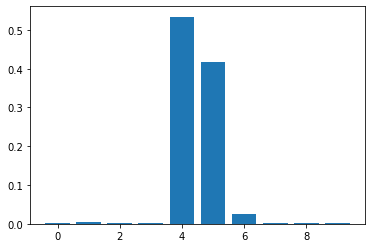

In [56]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

--- 

# Presentation (Outline)

- Problem definition: Predicting success....
- Explain dataset (Kaggle, USA sample, how many startups, etc. )
- What is success? - closed, acquired, IPO EXPLAIN!!!
- How would you predict success? EDA!!!
    - Look at financing
        - What are typical financing options? How do they differ by success
    - You are predicting based on financing...
    
- Machine Learning, Success Predictor
- Explain your mode, your feature set and what it does
- Result

- optional: Discussion